In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
%matplotlib inline

In [4]:
sample = sps.norm.rvs(size=100, loc=0, scale=1)

## Оценка максимального правдоподобия для выборки из нормального распределения - это $\overline{X}$
## Байесовская оценка  в модели $N(\theta, 1)$- это матожидание случайной величины с нормальным распределением с параметрами $N(\frac{\Sigma x_i + \frac{a}{\sigma^2}}{\frac{1}{\sigma^2}+n}, \frac{1}{\frac{1}{\sigma^2}+n})$, где $(a, \sigma^2)$ - паарметры сдвига и масштаба
## Посчитаем её и нарисуем графики

In [5]:
mark_max = []
colors = ['green', 'blue', 'magenta', 'purple']
param = [[0, 1], [0, 100], [10, 1],[10, 100]]
apr_mark = [[],[],[],[]]

for i in range(100):
    arr = sample[: i + 1]
   
    for j in range(4):
        apr_mark[j].append(sps.norm.mean(loc=(param[j][0]/param[j][1]/param[j][1]+sum(arr))/(1/param[j][1]/param[j][1]+i+1), 
                                         scale=(1/((1/param[j][1]/param[j][1])+ i + 1))))
    mark_max.append(arr.mean())

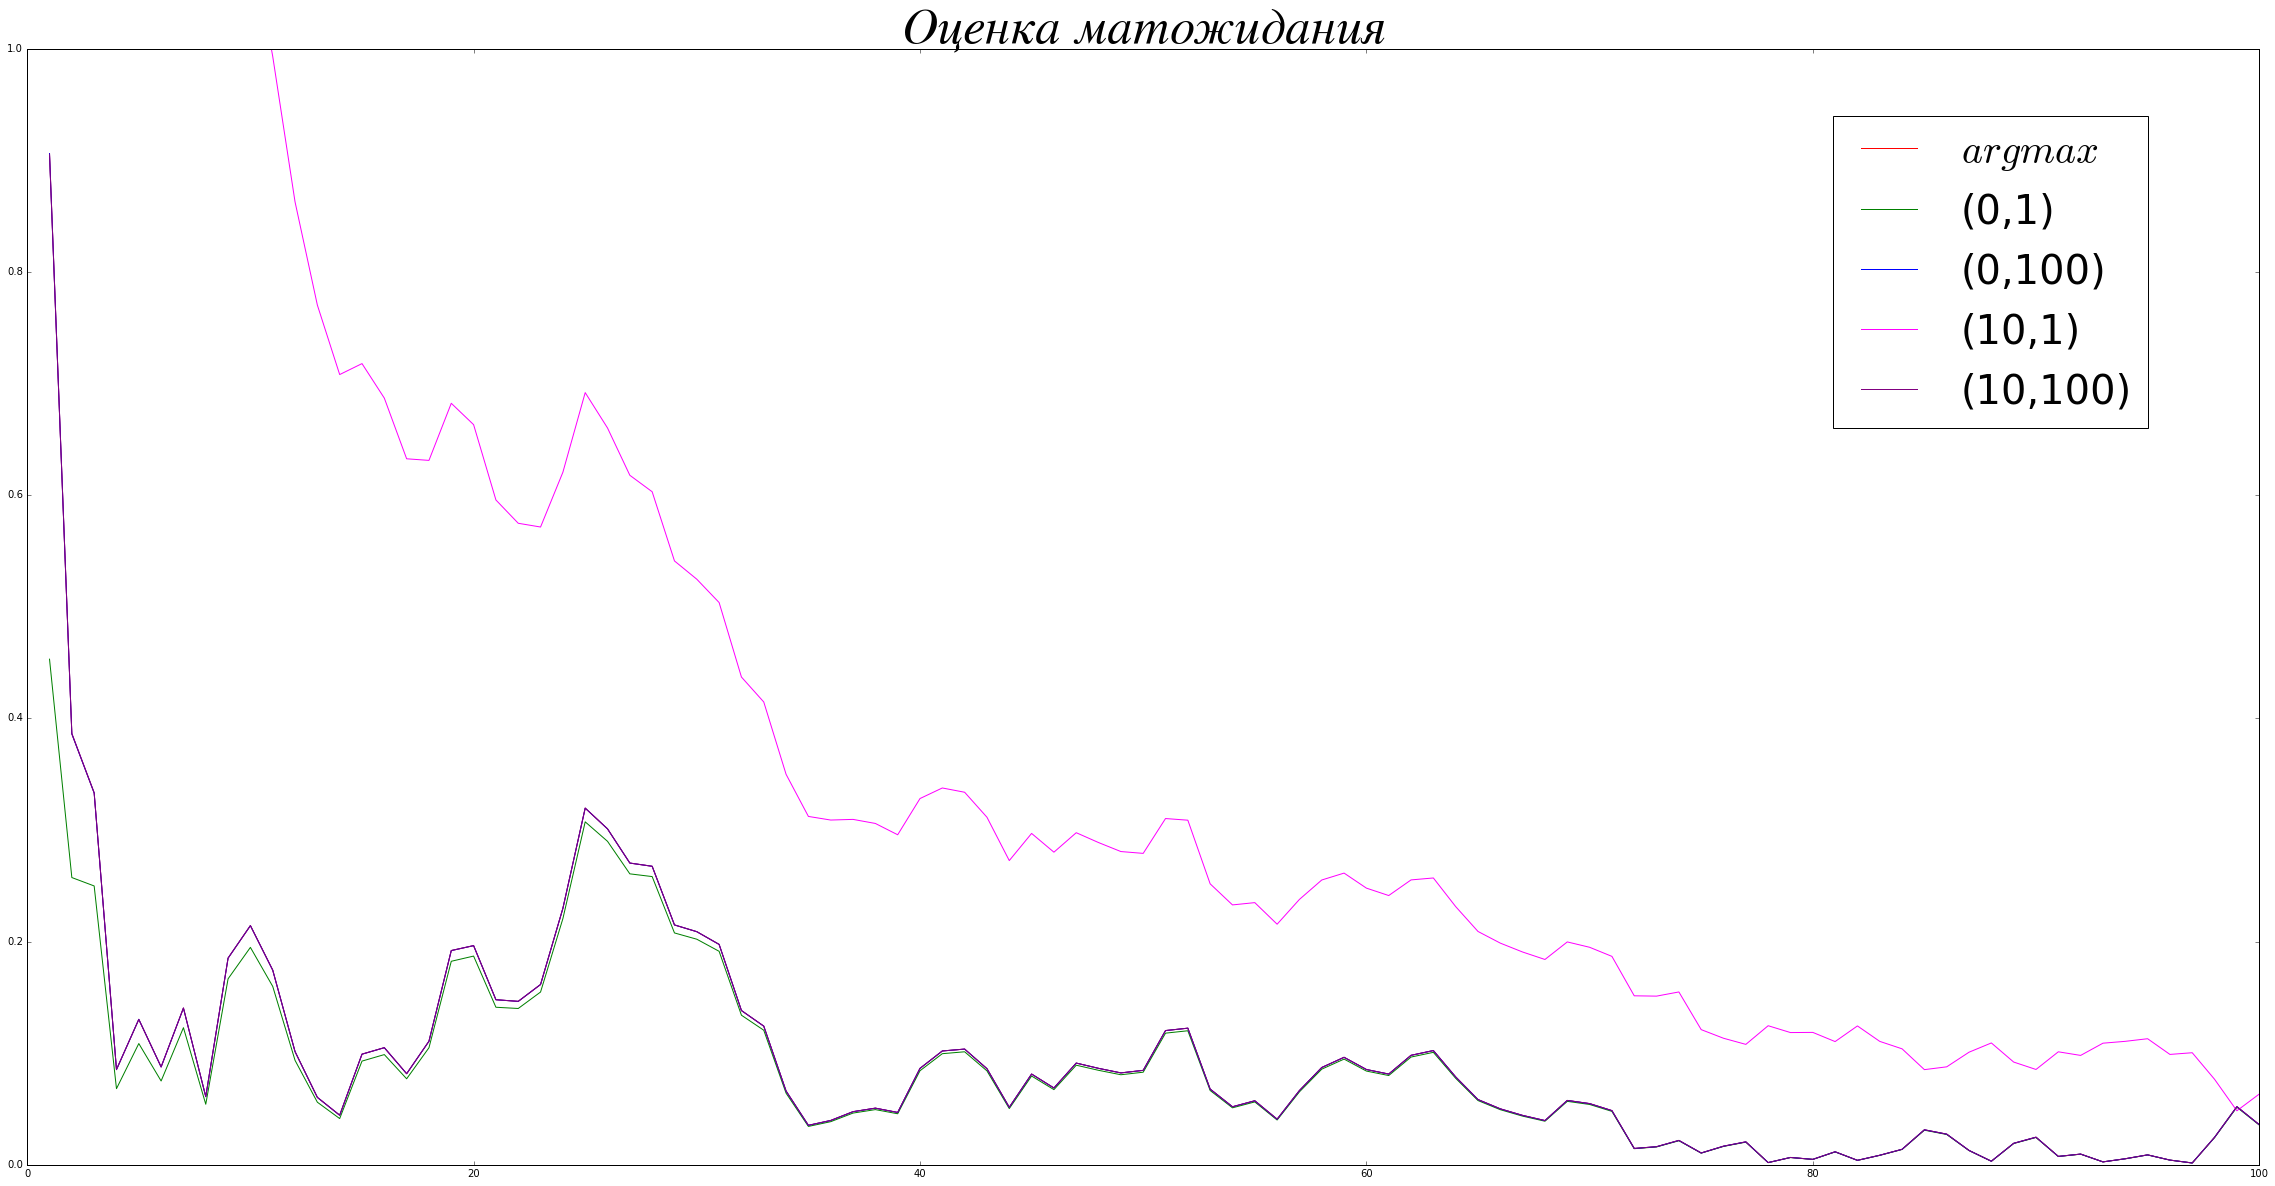

In [6]:
# нарисуем графики 
plt.figure(figsize=(40,20))
plt.title(u'$Оценка\ матожидания$', fontsize = 50)
plt.plot(np.arange(1, 101), abs(np.array(mark_max)), color = 'red', label='$argmax$')

for j in range(4):
    plt.plot(np.arange(1, 101), abs(np.array(apr_mark[j])), color = colors[j], 
            label='('+str(param[j][0])+','+str(param[j][1])+')')

plt.legend(loc='center left', bbox_to_anchor=(0.8, 0.8), fontsize = 40)
plt.ylim(0, 1)
plt.show()

## Действительно, оценки довольно быстро стремятся к нулю, а некоторые просто совпадают

## Аналогичные исследования проведем для модели $N(0, \theta)$
## Оценка дисперсии по методу максимального правдоподобия - $S^2$ 
## Сопряженное - это обратное гамма распределение, матожадиние у которого - $\frac{\beta + \frac{\Sigma x_i}{2}}{\alpha + \frac{n}{2} - 1}$, где параметры $\alpha, \beta$ даны нам по условию

In [7]:
param1 = [[1, 1], [1, 100], [10, 1],[10, 100]]
apr_mark1 = [[],[],[],[]]
mark_max1 = []

for i in range(100):
    arr = sample[: i + 1]
    arr_square = arr*arr
   
    for j in range(4):
        apr_mark1[j].append((param1[j][1]+ sum(arr_square)/2)/(param1[j][0]+(i+1)/2 - 1))
    
    mark_max1.append(arr_square.mean()-arr.mean()*arr.mean())

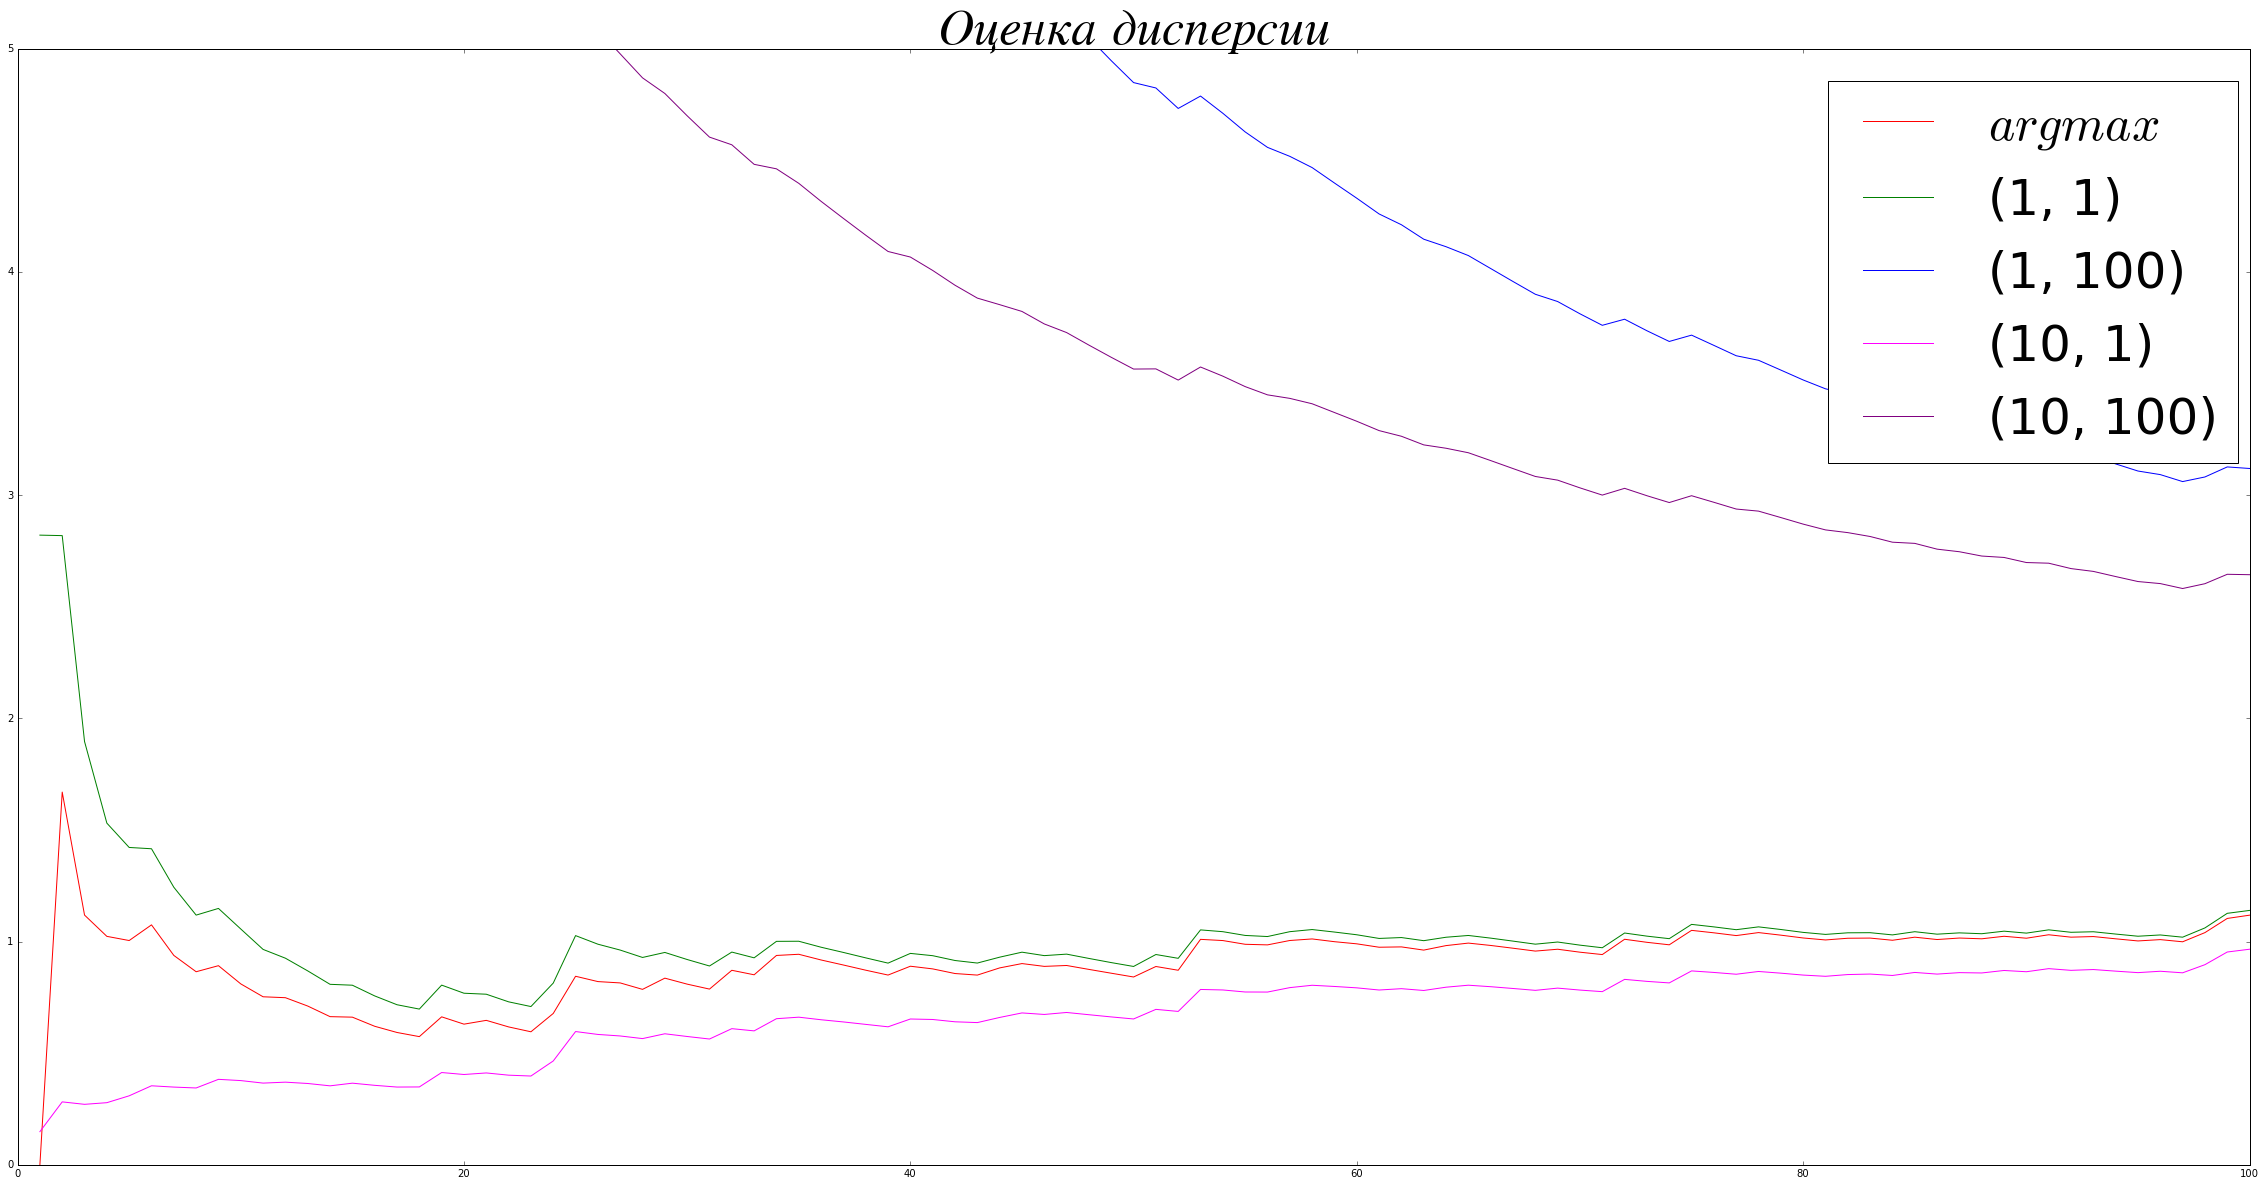

In [8]:
# нарисуем графики 
plt.figure(figsize=(40,20))
plt.title(u'$Оценка\ дисперсии$', fontsize = 50)
plt.plot(np.arange(1, 101), abs(np.array(mark_max1)), color = 'red', label='$argmax$')

for j in range(4):
    plt.plot(np.arange(1, 101), abs(np.array(apr_mark1[j])), color = colors[j], 
            label='('+str(param1[j][0])+', '+str(param1[j][1])+')')

plt.legend(loc='center left', bbox_to_anchor=(0.8, 0.8), fontsize = 50)
plt.ylim(0, 5)
plt.show()

## Оценки дисперсии с параметрами сдвига и масштаба $(1, 100)$ и $(10, 100)$ сходятся к 1 очень медленно